# 偏微分(Partial Differentiation)

## 范例1. 简单线性回归
$\begin{equation}y = 2x + 1\end{equation}$

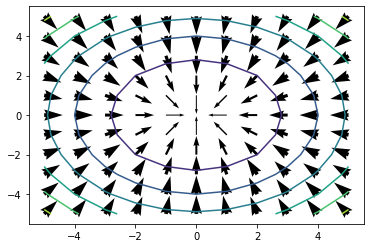

In [1]:
# 载入套件
import matplotlib.pyplot as plt
import numpy as np
import math

## 建立等距方格(meshgrid)的交叉点
el = np.arange(-5,6)
nx, ny = np.meshgrid(el, el, sparse=False, indexing='ij')

## 建构等高线，计算 z 值
x_coord = []
y_coord = []
z = []
for i in range(11):  
    for j in range(11):
        x_coord.append(float(-nx[i,j]))
        y_coord.append(float(-ny[i,j]))       
        z.append(nx[i,j]**2 + ny[i,j]**2)

## 计算 x、y 梯度(gradients)
x_grad = [-2 * x for x in x_coord]
y_grad = [-2 * y for y in y_coord] 

## 沿着梯度，画箭头(arrows)
plt.xlim(-5.5,5.5)
plt.ylim(-5.5,5.5)
for x, y, xg, yg in zip(list(x_coord), list(y_coord), list(x_grad), list(y_grad)):
    if x != 0.0 or y != 0.0: ## Avoid the zero divide when scaling the arrow
        l = math.sqrt(xg**2 + yg**2)/2.0
        plt.quiver(x, y, xg, yg, width = l, units = 'dots')

## 画等高线(Contour)
z = np.array(z).reshape(11,11)    
plt.contour(el, el, z)    
plt.show()

## 函数如下：
### $f(x,y) = x^2 + y^2$

## 偏微分
### $\frac{\partial f(x,y)}{\partial x} = \frac{\partial (x^2 + y^2)}{\partial x} = 2x + 0 = 2x$

### $\frac{\partial f(x,y)}{\partial y} = \frac{\partial (x^2 + y^2)}{\partial x} = 2y + 0 = 2y$



In [2]:
# f(x) = x^2 + y^2

from sympy import *
x, y = symbols('x y')

# 对 x 偏微分
y1 = x**2 + y**2
yprime1 = y1.diff(x)
print(yprime1)

# 对 y 偏微分
yprime2 = y1.diff(y)
print(yprime2)


2*x
2*y


## 利用梯度下降法(Gradient Descent)找最小值

### 1. 可以任意设定一起始点(x_start)
### 2. 计算该点的梯度 fd(x)
### 3. 沿着梯度更新x，逐步逼近最佳解，幅度大小以学习率控制
####     新的x = x — 学习率(learning rate) * 梯度(gradient)
### 4. 重复步骤2、3，判断梯度是否接近于0，若已很逼近，即找到最佳解


[5.   4.   3.2  2.56 2.05 1.64 1.31 1.05 0.84 0.67 0.54 0.43 0.34 0.27
 0.22 0.18 0.14 0.11 0.09 0.07 0.06 0.05 0.04 0.03 0.02 0.02]


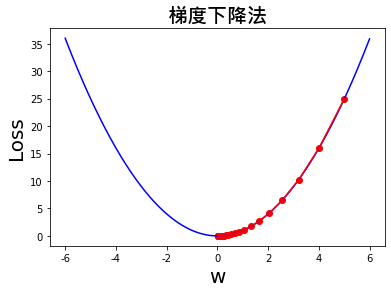

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 函数 f(x)=x^2
def f(x): return x ** 2 

# 一阶导数:dy/dx=2*x
def fd(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    xs = np.zeros(epochs+1)    
    w = x_start    
    xs[0] = w    
    for i in range(epochs):         
        dx = df(w)        
        # 权重的更新 
        # W_NEW = W — 学习率(learning rate) x 梯度(gradient)
        w += - lr * dx         
        xs[i+1] = w    
    return xs


# 超参数(Hyperparameters)
x_start = 5    # 起始权重
epochs = 25    # 执行周期数
lr = 0.1       # 学习率

# 梯度下降法, 函数 fd 直接当参数传递 
w = GD(x_start, fd, epochs, lr=lr) 
# 显示每一执行周期得到的权重
print (np.around(w, 2))

# 画图
color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, f(t), c='b')
plt.plot(w, f(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, f(w), c=color, ) 

# 设定中文字型
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msjhbd.ttc", size=20)   
plt.title('梯度下降法', fontproperties=font)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

# 矫正负号
plt.rcParams['axes.unicode_minus'] = False

plt.show()

## 起始点 x_start = -5，依然可以找到最小值

[-5.   -4.   -3.2  -2.56 -2.05 -1.64 -1.31 -1.05 -0.84 -0.67 -0.54 -0.43
 -0.34 -0.27 -0.22 -0.18 -0.14 -0.11 -0.09 -0.07 -0.06 -0.05 -0.04 -0.03
 -0.02 -0.02]


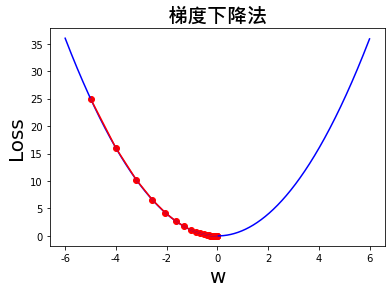

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 函数 f(x)=x^2
def f(x): return x ** 2 

# 一阶导数:dy/dx=2*x
def fd(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    xs = np.zeros(epochs+1)    
    w = x_start    
    xs[0] = w    
    for i in range(epochs):         
        dx = df(w)        
        # 权重的更新 
        # W_NEW = W — 学习率(learning rate) x 梯度(gradient)
        w += - lr * dx         
        xs[i+1] = w    
    return xs


# 超参数(Hyperparameters)
x_start = -5    # 起始权重
epochs = 25    # 执行周期数
lr = 0.1       # 学习率

# 梯度下降法, 函数 fd 直接当参数传递 
w = GD(x_start, fd, epochs, lr=lr) 
# 显示每一执行周期得到的权重
print (np.around(w, 2))

# 画图
color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, f(t), c='b')
plt.plot(w, f(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, f(w), c=color, ) 

# 设定中文字型
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msjhbd.ttc", size=20)   
plt.title('梯度下降法', fontproperties=font)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

# 矫正负号
plt.rcParams['axes.unicode_minus'] = False

plt.show()

## 设定学习率 lr = 0.9：如果函数较复杂，可能会跳过最小值

[ 5.   -4.    3.2  -2.56  2.05 -1.64  1.31 -1.05  0.84 -0.67  0.54 -0.43
  0.34 -0.27  0.22 -0.18  0.14 -0.11  0.09 -0.07  0.06 -0.05  0.04 -0.03
  0.02 -0.02]


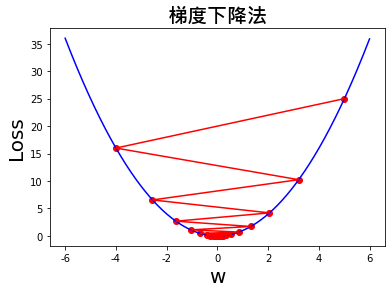

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 函数 f(x)=x^2
def f(x): return x ** 2 

# 一阶导数:dy/dx=2*x
def fd(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    xs = np.zeros(epochs+1)    
    w = x_start    
    xs[0] = w    
    for i in range(epochs):         
        dx = df(w)        
        # 权重的更新 
        # W_NEW = W — 学习率(learning rate) x 梯度(gradient)
        w += - lr * dx         
        xs[i+1] = w    
    return xs


# 超参数(Hyperparameters)
x_start = 5     # 起始权重
epochs = 25     # 执行周期数
lr = 0.9        # 学习率

# 梯度下降法, 函数 fd 直接当参数传递 
w = GD(x_start, fd, epochs, lr=lr) 
# 显示每一执行周期得到的权重
print (np.around(w, 2))

# 画图
color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, f(t), c='b')
plt.plot(w, f(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, f(w), c=color, ) 

# 设定中文字型
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msjhbd.ttc", size=20)   
plt.title('梯度下降法', fontproperties=font)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

# 矫正负号
plt.rcParams['axes.unicode_minus'] = False

plt.show()

## 设定学习率 lr = 0.01：还未逼近最小值，就提早停止了
## 可以增加‘执行周期数’，解决问题

[5.   4.9  4.8  4.71 4.61 4.52 4.43 4.34 4.25 4.17 4.09 4.   3.92 3.85
 3.77 3.69 3.62 3.55 3.48 3.41 3.34 3.27 3.21 3.14 3.08 3.02]


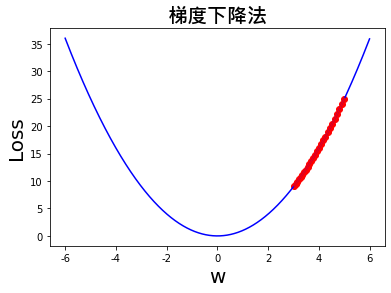

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 函数 f(x)=x^2
def f(x): return x ** 2 

# 一阶导数:dy/dx=2*x
def fd(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    xs = np.zeros(epochs+1)    
    w = x_start    
    xs[0] = w    
    for i in range(epochs):         
        dx = df(w)        
        # 权重的更新 
        # W_NEW = W — 学习率(learning rate) x 梯度(gradient)
        w += - lr * dx         
        xs[i+1] = w    
    return xs


# 超参数(Hyperparameters)
x_start = 5     # 起始权重
epochs = 25     # 执行周期数
lr = 0.01        # 学习率

# 梯度下降法, 函数 fd 直接当参数传递 
w = GD(x_start, fd, epochs, lr=lr) 
# 显示每一执行周期得到的权重
print (np.around(w, 2))

# 画图
color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, f(t), c='b')
plt.plot(w, f(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, f(w), c=color, ) 

# 设定中文字型
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msjhbd.ttc", size=20)   
plt.title('梯度下降法', fontproperties=font)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

# 矫正负号
plt.rcParams['axes.unicode_minus'] = False

plt.show()